# Topic Modeling

-Reading the file using pandas
-Using spacy package, using language models to remove stop words from the text and also performing TfIdf vectorizer.
-flatten the paragraphs keeping the years
-Importing the NMF (Non-negative Matrix Factorization) class from scikit-learn's decomposition module
-utilizes scikit-learn's CountVectorizer to convert text paragraphs into a matrix of token counts, with specified parameters for filtering low and high frequency terms.
-utilizes scikit-learn's Latent Dirichlet Allocation (LDA) algorithm to perform topic modeling on a document-term matrix, producing topic distributions for documents and word distributions for topics.
-defines a function named wordcloud_topics that generates word clouds for topics extracted by a given model, displaying the most prominent words in each topic. Additionally, it adjusts the output display size to accommodate larger images.
-The code iterates over the components of an NMF model to retrieve the top two most important words for each topic, then creates topic names using these words.
-The code calculates the topic distribution percentages for each year in the dataset using NMF and TF-IDF vectorized data, and stores the results in a list called year_data.

# Open the file

In [6]:
import pandas as pd
file = "C:\\Users\\DELL\\Desktop\\CS-652 Text Based Analysis\\Datasets\\amazon_reviews.csv"
df = pd.read_csv(file)
df.head(20)


reviewerID        asin  \
0   A3SBTW3WS4IQSN  B007WTAJTO   
1   A18K1ODH1I2MVB  B007WTAJTO   
2   A2FII3I2MBMUIA  B007WTAJTO   
3    A3H99DFEG68SR  B007WTAJTO   
4   A375ZM4U047O79  B007WTAJTO   
5   A2IDCSC6NVONIZ  B007WTAJTO   
6   A26YHXZD5UFPVQ  B007WTAJTO   
7   A3CW0ZLUO5X2B1  B007WTAJTO   
8   A2CYJO155QP33S  B007WTAJTO   
9   A2S7XG3ZC4VGOQ  B007WTAJTO   
10  A1RTQROTWR5NCB  B007WTAJTO   
11  A2Q3ICGWZLY3JJ  B007WTAJTO   
12   AN2VFTXYW1SZU  B007WTAJTO   
13   AVHN134ADVP4R  B007WTAJTO   
14   A3EA7KGYC8LB0  B007WTAJTO   
15  A29RI184HRX66H  B007WTAJTO   
16  A2G9ZHVA6IOGBY  B007WTAJTO   
17  A1OATGH4DF0RF0  B007WTAJTO   
18  A1V6CQACZ9IOLC  B007WTAJTO   
19  A2ELBSIZ26GKM2  B007WTAJTO   

                                        reviewerName helpful  \
0                                                NaN  [0, 0]   
1                                               0mie  [0, 0]   
2                                                1K3  [0, 0]   
3                                                1m2  [0, 0]   
4                                       2&amp;1/2Men  [0, 0]   
5                                            2Cents!  [0, 0]   
6                                         2K1Toaster  [0, 0]   
7   35-year Technology Consumer "8-tracks to 802.11"  [0, 0]   
8                                          4evryoung  [1, 1]   
9                                           53rdcard  [0, 0]   
10                                         808TREX50  [0, 0]   
11                                             98020  [0, 0]   
12                                            9z4cda  [0, 0]   
13                              A4Q96 "Gadget Lover"  [0, 0]   
14                                     Aaron "Aaron"  [0, 0]   
15                                     Aaron "Aaron"  [0, 0]   
16                                     Aaron Alvarez  [0, 0]   
17                                 Aaron F. Virginie  [0, 1]   
18                                      Aaron Graves  [0, 0]   
19                                             Aaron  [0, 0]   

                                           reviewText  overall  \
0                                          No issues.      4.0   
1   Purchased this for my device, it worked as adv...      5.0   
2   it works as expected. I should have sprung for...      4.0   
3   This think has worked out great.Had a diff. br...      5.0   
4   Bought it with Retail Packaging, arrived legit...      5.0   
5   It's mini storage.  It doesn't do anything els...      5.0   
6   I have it in my phone and it never skips a bea...      5.0   
7   It's hard to believe how affordable digital ha...      5.0   
8   Works in a HTC Rezound.  Was running short of ...      5.0   
9   in my galaxy s4, super fast card, and am total...      5.0   
10  I like this SD Card because it can take music ...      5.0   
11  It works, but file writes are a bit slower tha...      3.0   
12      THE NAME OF ITSELF SPEAKS OUT. GO SANDISK GO!      5.0   
13  Solid SDHC card that is fast (at reading and w...      5.0   
14  Heard that the card's write speed is insuffici...      5.0   
15  I bought this to use with my go pro hero 3 bla...      5.0   
16  got this because i had a 2 GB one that filled ...      5.0   
17  Class 10 Speed Rating for Seamless Full HD Vid...      5.0   
18  The read and write speeds are better than the ...      5.0   
19  This works with the NL1520.  No video stutteri...      5.0   

                                              summary  unixReviewTime  \
0                                          Four Stars      1406073600   
1                                       MOAR SPACE!!!      1382659200   
2                           nothing to really say....      1356220800   
3              Great buy at this price!!!  *** UPDATE      1384992000   
4                                    best deal around      1373673600   
5                         Not a lot to really be said      1367193600   
6                                          Works w

In [7]:
print(repr(df.iloc[2666]["reviewText"][0:400]))
print(repr(df.iloc[4726]["reviewText"][0:400]))


"Not much to say here except that this is a decently priced product from a reliable manufacturer, you can't go wrong. I use this for my 1st generation Surface RT; I store movies on here and watch directly off the SD Card, works great!"
'Great for my LG Optimus G and super fast transfer speeds. And no lagging for the games the many 3D games on my android.'


In [8]:
print(df.dtypes)

reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
day_diff            int64
helpful_yes         int64
total_vote          int64
dtype: object


In [13]:
# Using regular expression splitting the text
# Convert non-string values to empty string
df["reviewText"] = df["reviewText"].astype(str)

import re
df["paragraphs"] = df["reviewText"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

In [15]:
!pip install spacy
import spacy


In [17]:
# Using spacy package, using language models to remove stop words from the text and also performing TfIdf vectorizer.
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
stopwords = list(stopwords)
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['reviewText'])
tfidf_text_vectors.shape



C:\Users\DELL\anaconda3\1\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(4915, 2090)

In [24]:
# flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "reviewText": paragraph, "unixReviewTime": unixReviewTime } 
                               for paragraphs, unixReviewTime in zip(df["paragraphs"], df["unixReviewTime"]) 
                                    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)


reviewText  unixReviewTime
0                                         No issues.      1406073600
1  Purchased this for my device, it worked as adv...      1382659200
2  it works as expected. I should have sprung for...      1356220800
3  This think has worked out great.Had a diff. br...      1384992000
4  Bought it with Retail Packaging, arrived legit...      1373673600
5  It's mini storage.  It doesn't do anything els...      1367193600
6  I have it in my phone and it never skips a bea...      1382140800
7  It's hard to believe how affordable digital ha...      1404950400
8  Works in a HTC Rezound.  Was running short of ...      1395619200
9  in my galaxy s4, super fast card, and am total...      1381449600

In [26]:
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["reviewText"])
tfidf_para_vectors.shape


C:\Users\DELL\anaconda3\1\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(4915, 2090)

In [27]:
# # Importing the NMF (Non-negative Matrix Factorization) class from scikit-learn's decomposition module
from sklearn.decomposition import NMF
## Creating an instance of NMF with specified parameters:
# n_components: Number of components (or topics) to extract
# random_state: Seed for random number generation, for reproducibility
nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_


In [28]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out()) 



Topic 00
  card (8.15)
  sd (5.55)
  micro (2.96)
  adapter (1.94)
  comes (0.93)

Topic 01
  great (19.85)
  works (15.48)
  price (5.00)
  product (2.28)
  recommend (2.03)

Topic 02
  phone (10.14)
  got (1.37)
  cell (1.32)
  card (1.24)
  new (1.15)

Topic 03
  good (17.06)
  price (7.63)
  product (2.40)
  quality (2.34)
  speed (2.02)

Topic 04
  galaxy (10.33)
  samsung (8.47)
  note (5.73)
  s3 (3.79)
  s4 (3.62)

Topic 05
  memory (19.50)
  card (5.47)
  gb (2.32)
  32 (1.31)
  64 (1.03)

Topic 06
  storage (4.62)
  space (4.11)
  music (4.02)
  fast (2.46)
  pictures (2.44)

Topic 07
  gopro (6.52)
  camera (5.70)
  use (4.21)
  video (3.43)
  hero (2.61)

Topic 08
  tablet (12.18)
  bought (2.41)
  android (1.66)
  surface (1.62)
  asus (1.49)

Topic 09
  sandisk (4.43)
  cards (2.84)
  class (1.86)
  10 (1.59)
  ve (1.53)


In [29]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())



Topic 00
  card (8.15)
  sd (5.55)
  micro (2.96)
  adapter (1.94)
  comes (0.93)

Topic 01
  great (19.85)
  works (15.48)
  price (5.00)
  product (2.28)
  recommend (2.03)

Topic 02
  phone (10.14)
  got (1.37)
  cell (1.32)
  card (1.24)
  new (1.15)

Topic 03
  good (17.06)
  price (7.63)
  product (2.40)
  quality (2.34)
  speed (2.02)

Topic 04
  galaxy (10.33)
  samsung (8.47)
  note (5.73)
  s3 (3.79)
  s4 (3.62)

Topic 05
  memory (19.50)
  card (5.47)
  gb (2.32)
  32 (1.31)
  64 (1.03)

Topic 06
  storage (4.62)
  space (4.11)
  music (4.02)
  fast (2.46)
  pictures (2.44)

Topic 07
  gopro (6.52)
  camera (5.70)
  use (4.21)
  video (3.43)
  hero (2.61)

Topic 08
  tablet (12.18)
  bought (2.41)
  android (1.66)
  surface (1.62)
  asus (1.49)

Topic 09
  sandisk (4.43)
  cards (2.84)
  class (1.86)
  10 (1.59)
  ve (1.53)


In [30]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0


array([ 9.08134532, 13.56300521, 10.6519861 ,  9.02118838, 10.00860109,
        8.70781401, 10.76572189, 10.12046336,  6.34777085, 11.73210379])

In [31]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0


array([ 9.08134532, 13.56300521, 10.6519861 ,  9.02118838, 10.00860109,
        8.70781401, 10.76572189, 10.12046336,  6.34777085, 11.73210379])

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
count_para_vectorizer = CountVectorizer(stop_words=None, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["reviewText"])
count_para_vectors.shape


(4915, 2332)

In [34]:
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 5, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

In [35]:
display_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())



Topic 00
  for (3.47)
  this (3.35)
  the (3.00)
  to (2.41)
  of (2.27)

Topic 01
  it (6.26)
  to (2.74)
  for (2.71)
  of (2.06)
  the (1.87)

Topic 02
  it (3.14)
  have (2.37)
  with (2.24)
  sandisk (2.18)
  the (2.11)

Topic 03
  the (6.44)
  to (3.20)
  card (3.00)
  it (2.67)
  of (1.59)

Topic 04
  it (5.69)
  my (5.32)
  to (3.25)
  the (2.99)
  this (2.45)


In [36]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0


array([21.63001838,  9.70310008, 16.82179095, 24.07790951, 27.76718108])

In [37]:
!pip install pyLDAvis
!pip install pyLDAvis.sklearn

ERROR: Could not find a version that satisfies the requirement pyLDAvis.sklearn (from versions: none)
ERROR: No matching distribution found for pyLDAvis.sklearn


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')


C:\Users\DELL\AppData\Local\Temp\ipykernel_16756\3513515901.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


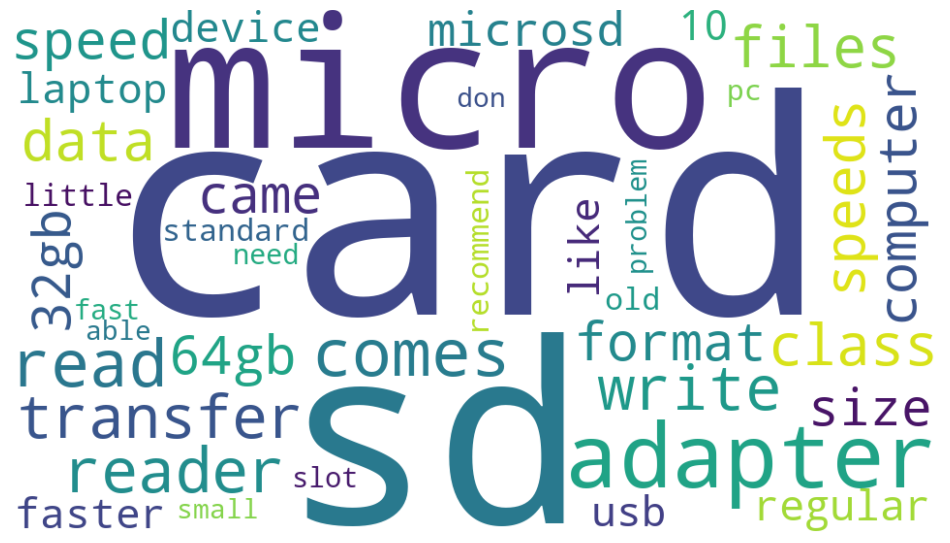

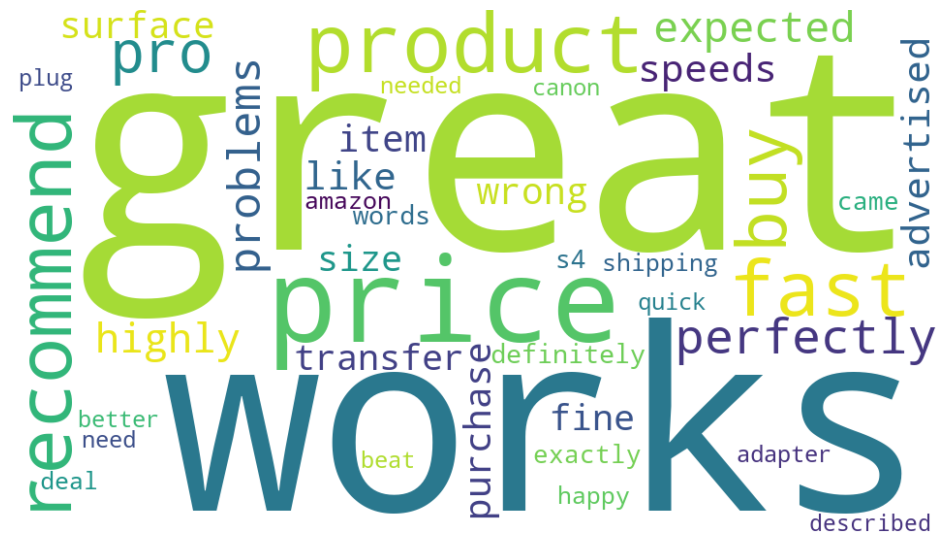

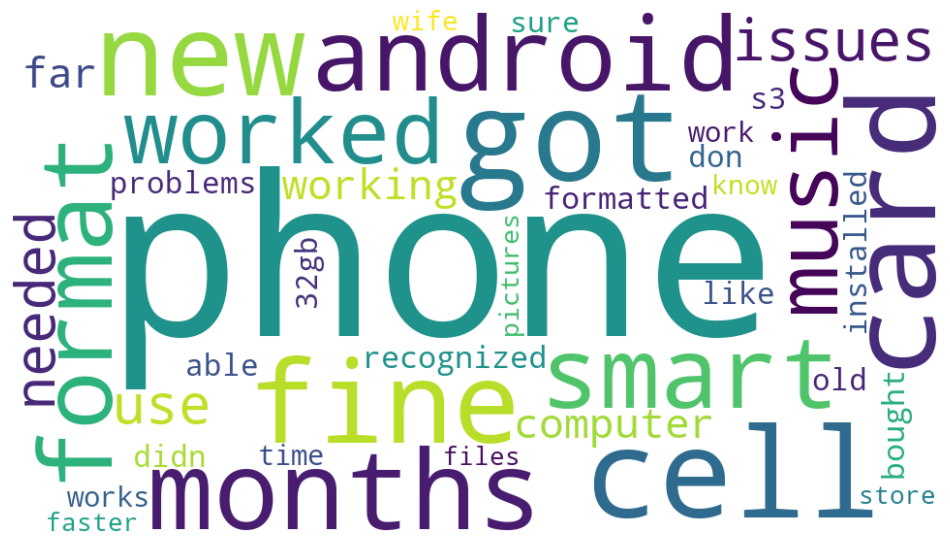

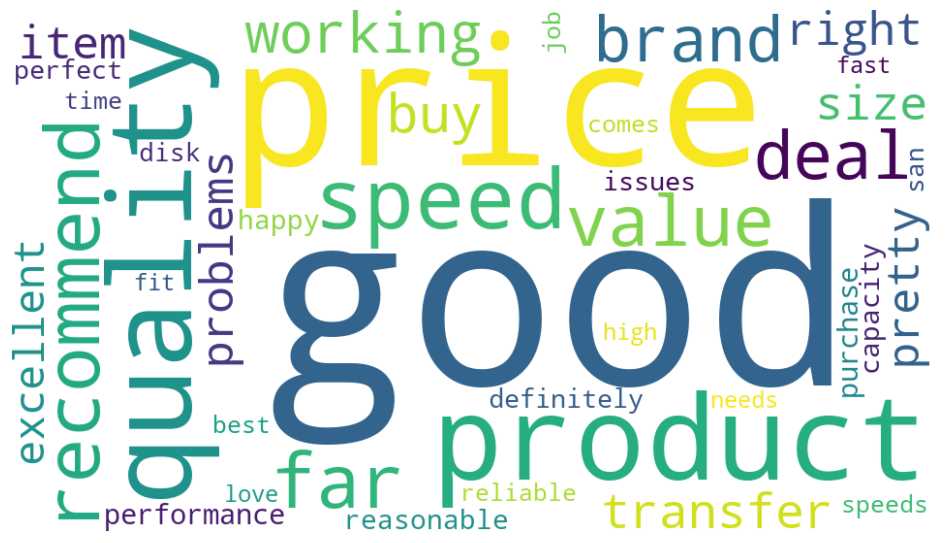

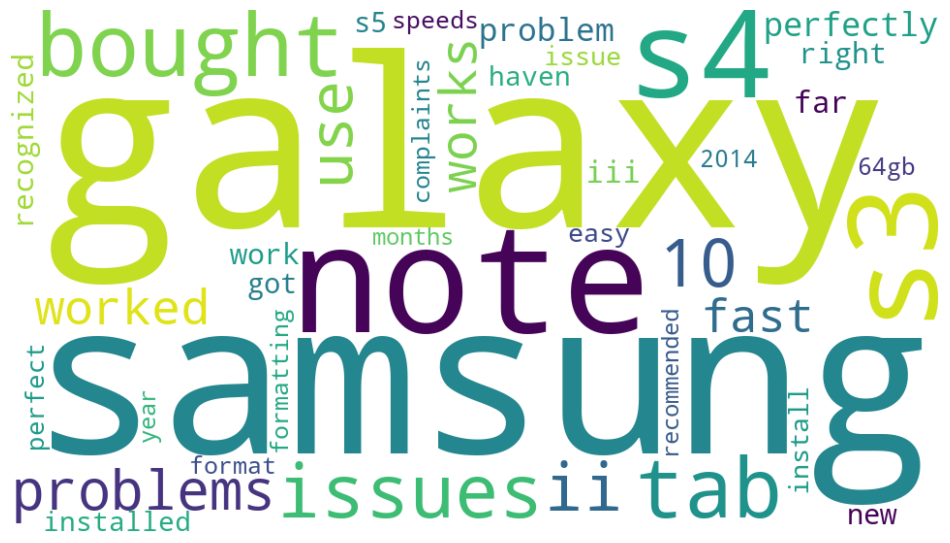

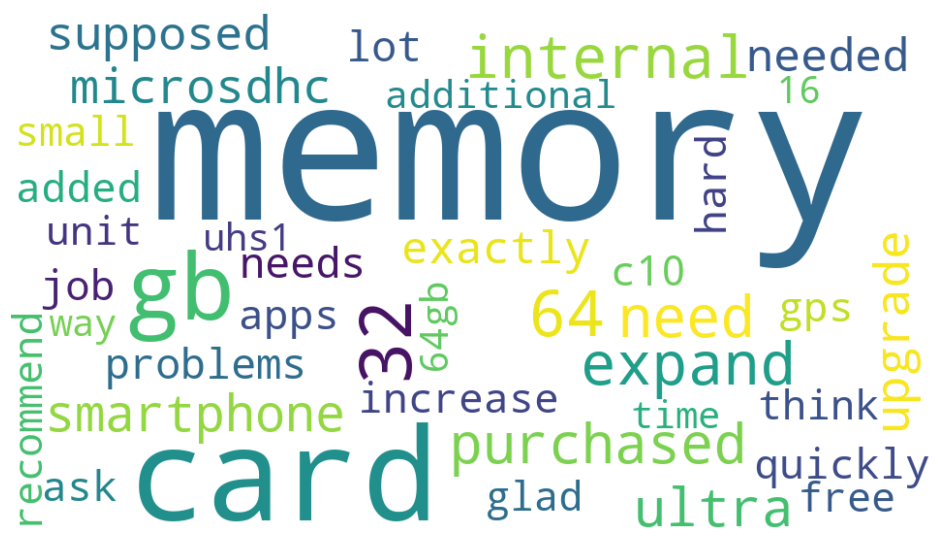

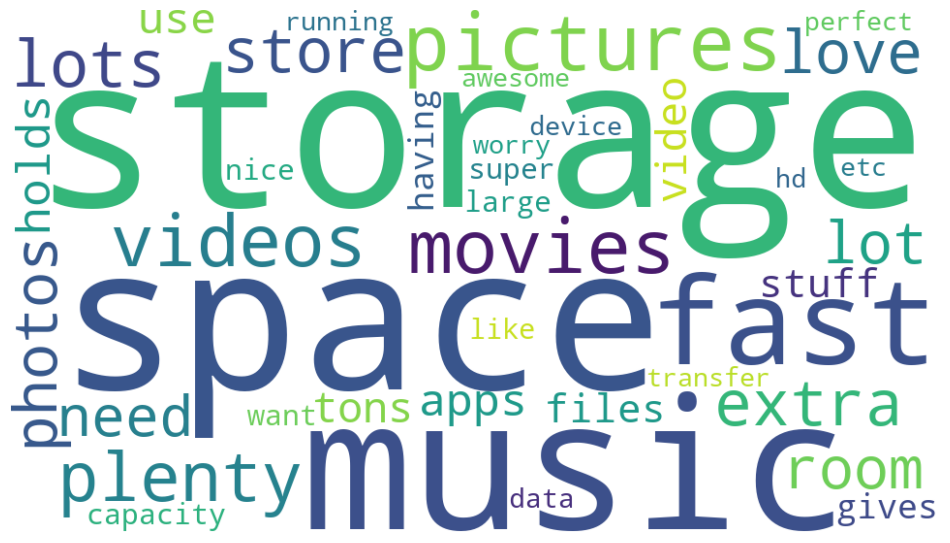

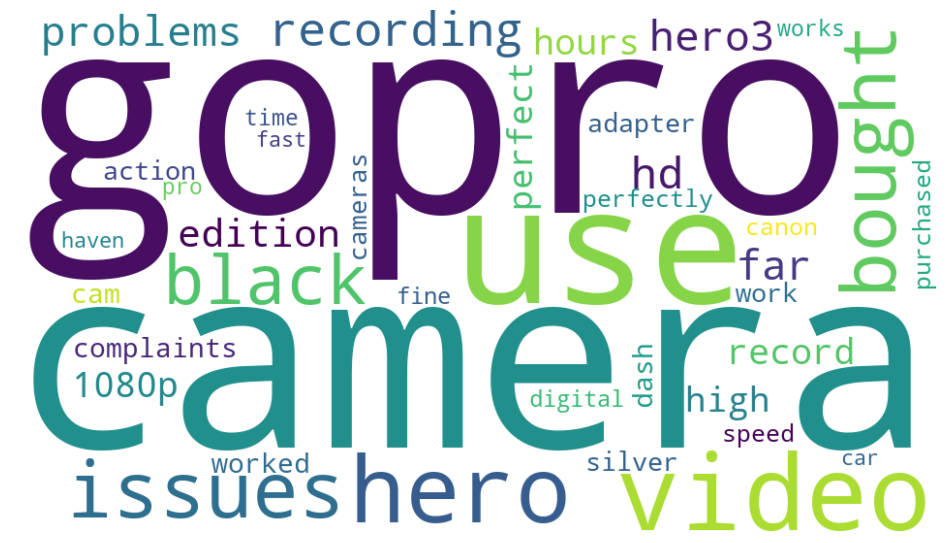

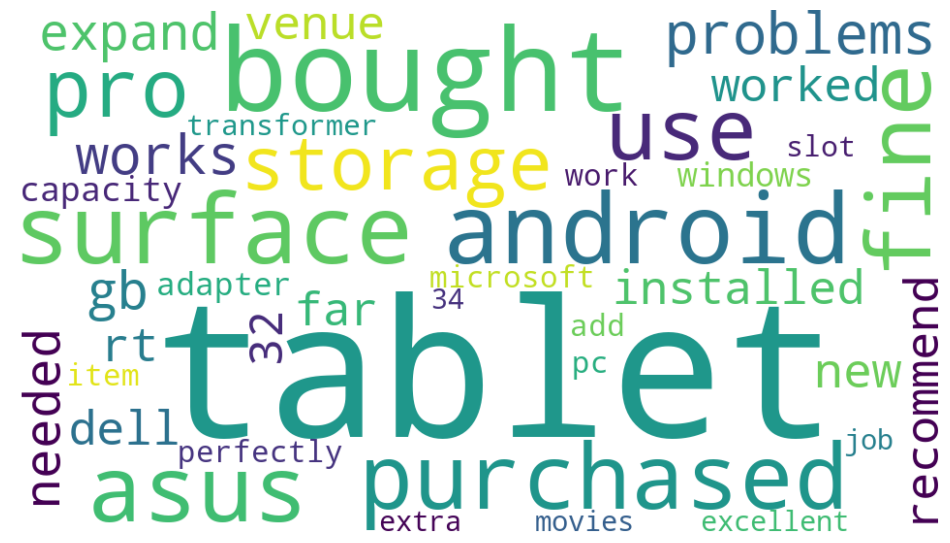

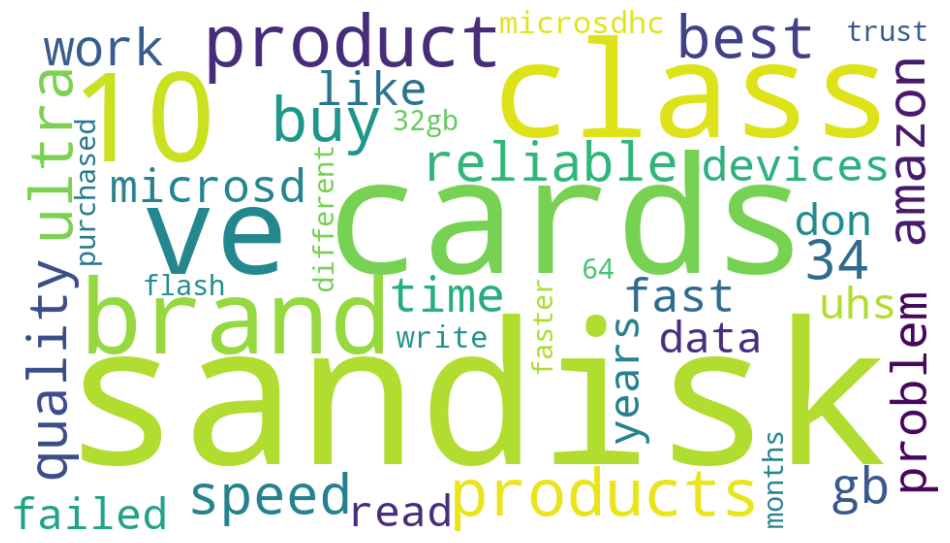

In [39]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


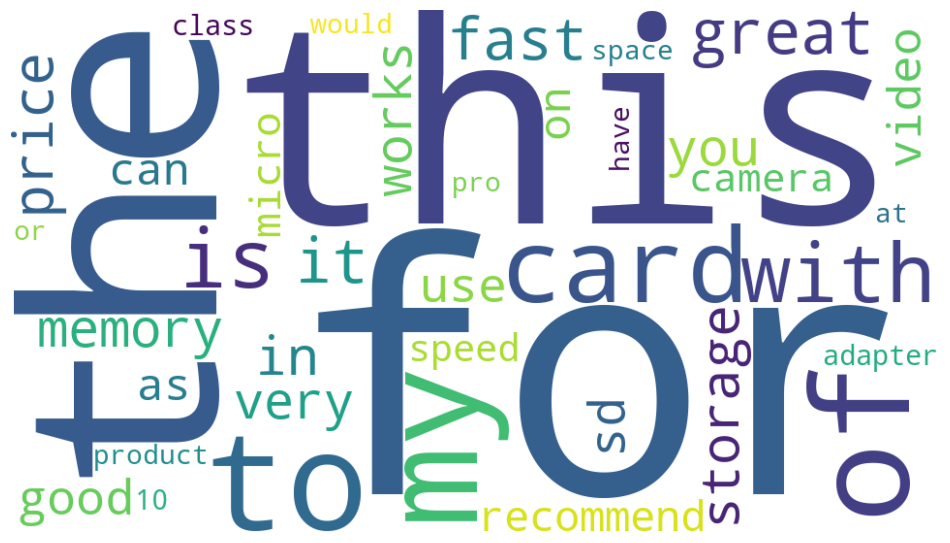

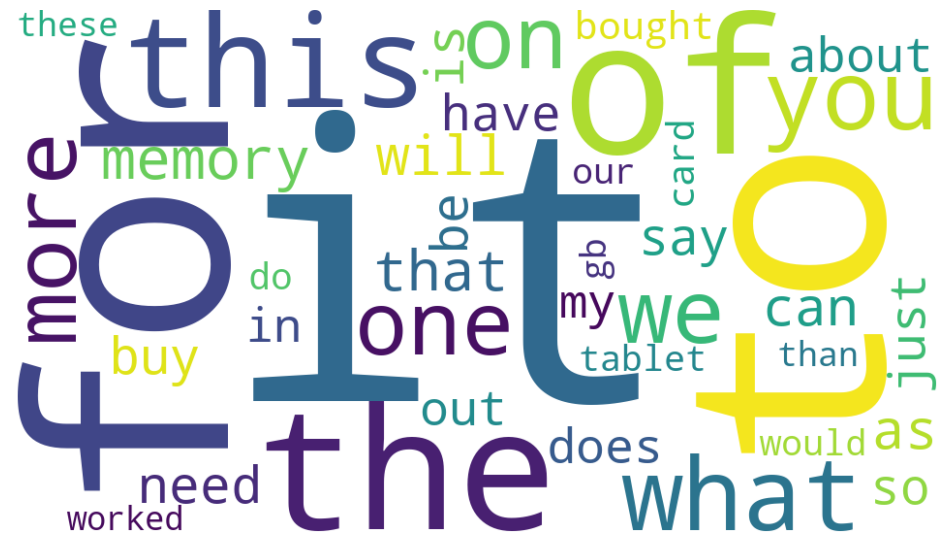

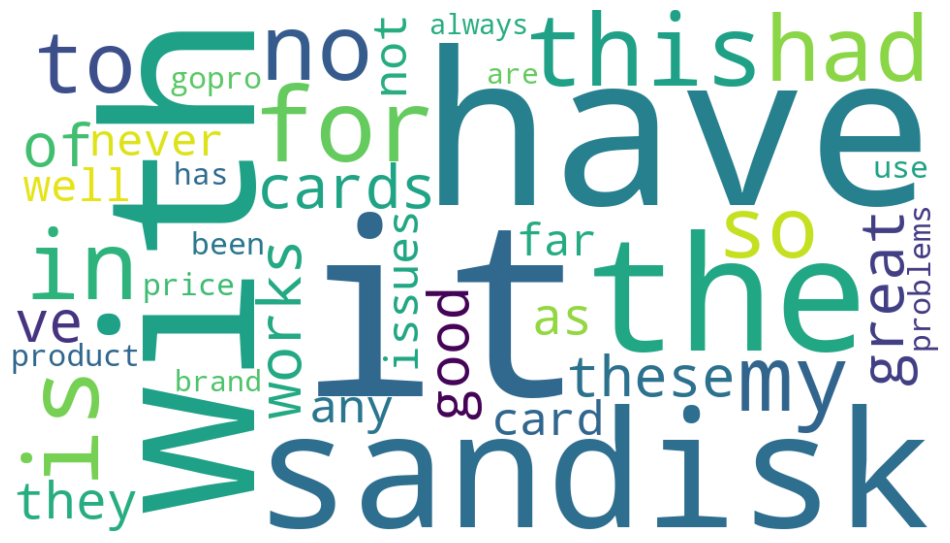

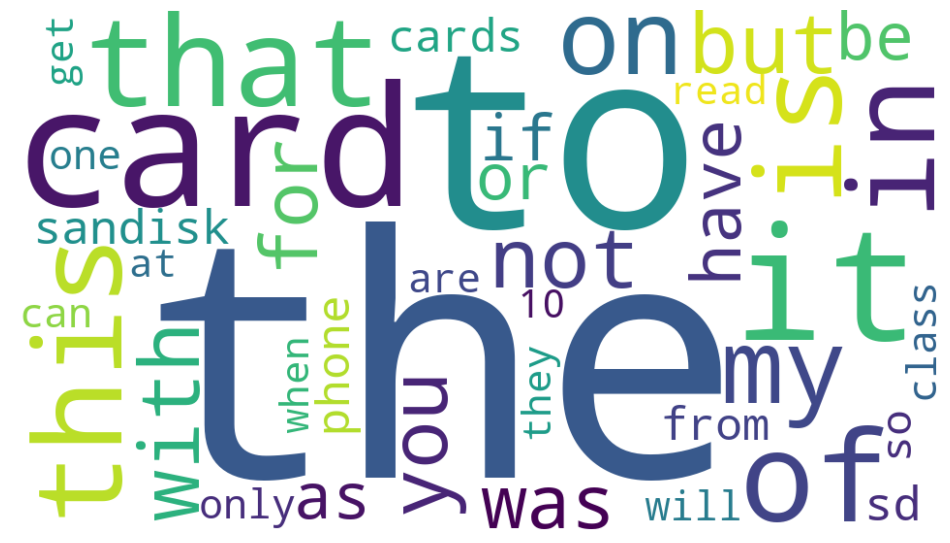

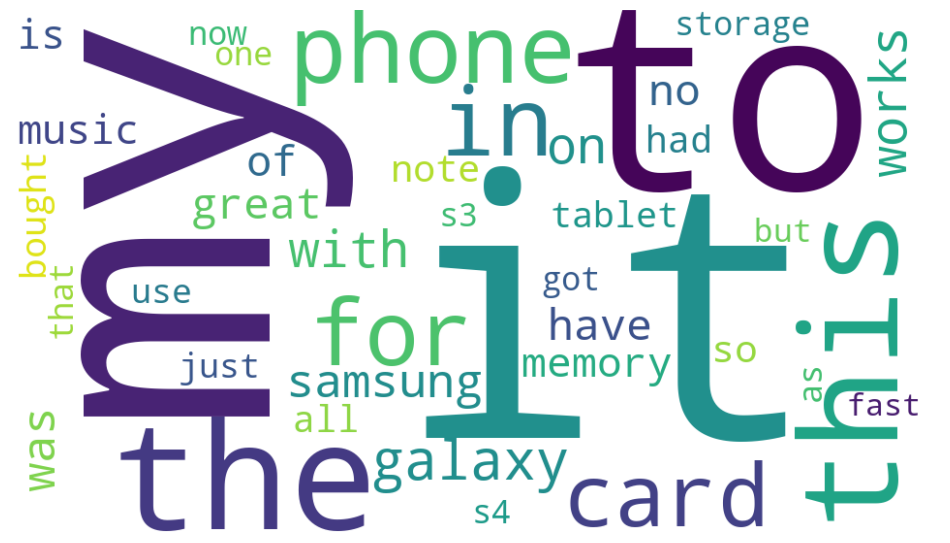

In [40]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())


In [41]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)


In [43]:
from tqdm.auto import tqdm
import numpy as np
unixReviewTime_data = []
for unixReviewTime in tqdm(np.unique(np.unique(paragraph_df["unixReviewTime"]))):
    W_unixReviewTime = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["unixReviewTime"] == unixReviewTime)])
    unixReviewTime_data.append([unixReviewTime] + list(W_unixReviewTime.sum(axis=0)/W_unixReviewTime.sum()*100.0))


  0%|          | 0/690 [00:00<?, ?it/s]

<Axes: xlabel='unixReviewTime'>

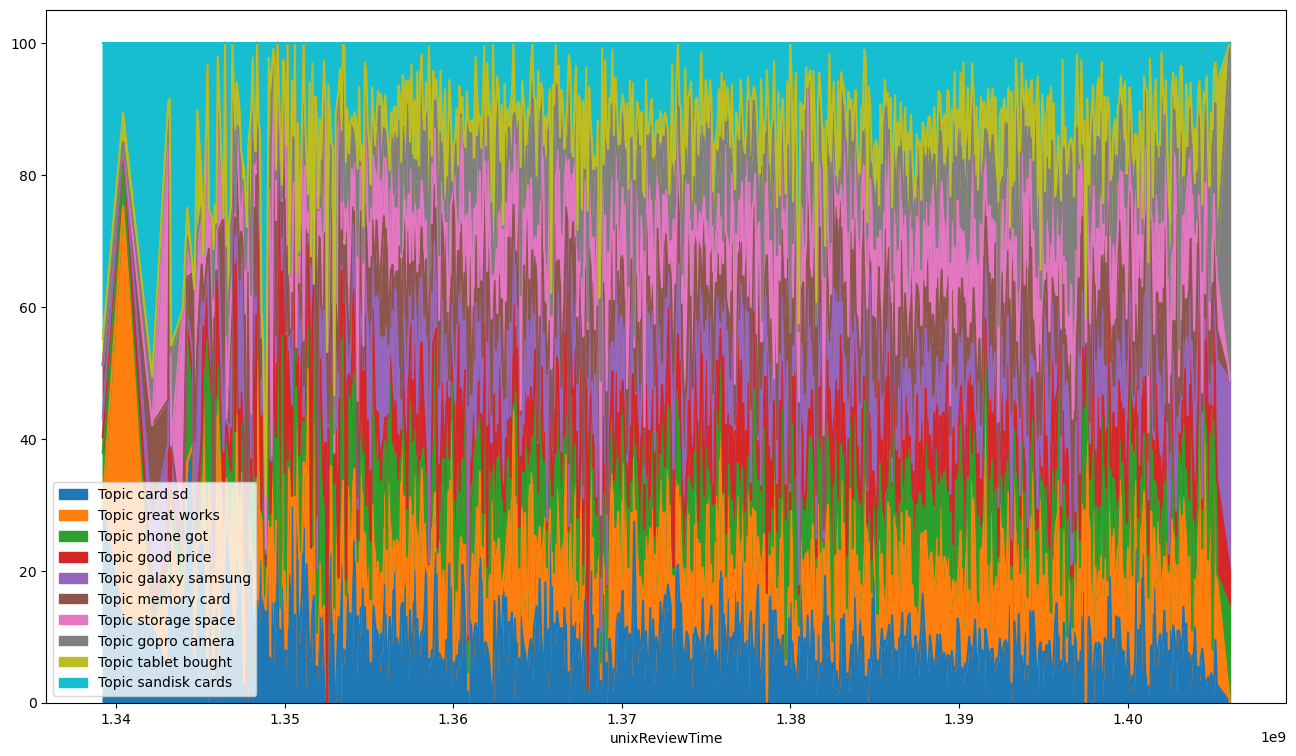

In [45]:
import matplotlib.pyplot as plt
df_unixReviewTime = pd.DataFrame(unixReviewTime_data, columns=["unixReviewTime"] + topic_names).set_index("unixReviewTime")
df_unixReviewTime.plot.area(figsize=(16,9))
